# TASK 2

In [42]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_movie = pd.read_csv('IMDb Movies India.csv', encoding='latin-1')

In [3]:
df_movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
df_movie.shape

(15509, 10)

In [6]:
df_movie.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [7]:
df_movie.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
df_movie.dropna(inplace=True)
df_movie.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [10]:
df_movie['Year'] = df_movie['Year'].str.extract('(\d+)')
df_movie['Year'] = pd.to_numeric(df_movie['Year'],errors='coerce')
df_movie['Duration'] = df_movie['Duration'].str.extract('(\d+)')
df_movie['Duration'] = pd.to_numeric(df_movie['Duration'],errors='coerce')

In [11]:
df_movie["Year"].head()

1    2019
3    2019
5    1997
6    2005
8    2012
Name: Year, dtype: int64

In [12]:
genre = df_movie['Genre']
genre.head(10)

1                         Drama
3               Comedy, Romance
5        Comedy, Drama, Musical
6           Drama, Romance, War
8     Horror, Mystery, Thriller
9       Action, Crime, Thriller
10                        Drama
11                       Horror
12    Horror, Romance, Thriller
13       Comedy, Drama, Romance
Name: Genre, dtype: object

In [13]:
genres = df_movie['Genre'].str.split(',', expand=True)
genres.head(10)

,0,1,2
1,Drama,None,None
3,Comedy,Romance,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
8,Horror,Mystery,Thriller
9,Action,Crime,Thriller
10,Drama,None,None
11,Horror,None,None
12,Horror,Romance,Thriller
13,Comedy,Drama,Romance


In [14]:
genre_counts ={}
for genre in genres.values.flatten():
    if genre is not None:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1
genre_counts = {genre: count for genre, count in sorted(genre_counts.items())}
for genre,count in genre_counts.items():
    print(f"{genre}: {count}")

 Action: 34
 Adventure: 172
 Biography: 31
 Comedy: 355
 Crime: 604
 Drama: 1954
 Family: 364
 Fantasy: 115
 History: 91
 Horror: 74
 Music: 50
 Musical: 322
 Mystery: 245
 News: 1
 Romance: 1221
 Sci-Fi: 28
 Sport: 38
 Thriller: 590
 War: 30
 Western: 1
Action: 1652
Adventure: 105
Animation: 40
Biography: 84
Comedy: 989
Crime: 271
Documentary: 48
Drama: 1842
Family: 52
Fantasy: 31
History: 8
Horror: 128
Music: 3
Musical: 90
Mystery: 59
Romance: 159
Sci-Fi: 4
Sport: 2
Thriller: 89
War: 3


In [15]:
genresPie = df_movie['Genre'].value_counts()
genresPie.head(10)

Drama                     844
Drama, Romance            332
Action, Crime, Drama      329
Action, Drama             206
Comedy, Drama             205
Comedy, Drama, Romance    188
Comedy                    187
Action                    170
Drama, Family             160
Romance                   126
Name: Genre, dtype: int64

In [16]:
genrePie = pd.DataFrame(list(genresPie.items()))
genrePie = genrePie.rename(columns = {0: 'Genre', 1:'Count'})
genrePie.head(10)

,Genre,Count
0,Drama,844
1,"Drama, Romance",332
2,"Action, Crime, Drama",329
3,"Action, Drama",206
4,"Comedy, Drama",205
5,"Comedy, Drama, Romance",188
6,Comedy,187
7,Action,170
8,"Drama, Family",160
9,Romance,126


In [17]:
df_movie['Votes'] = df_movie['Votes'].str.replace(',','').astype(int)
df_movie["Votes"].head(10)

1        8
3       35
5      827
6     1086
8      326
9       11
10      17
11      59
12     983
13     512
Name: Votes, dtype: int32

In [19]:
director = df_movie["Director"].value_counts()
director.head(10)

David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
Vikram Bhatt            30
Priyadarshan            29
Basu Chatterjee         23
Rama Rao Tatineni       23
Shyam Benegal           22
Name: Director, dtype: int64

In [20]:
actor = pd.concat([df_movie['Actor 1'], df_movie['Actor 2'], df_movie['Actor 3']]).dropna().value_counts()
actor.head(10)

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
Shashi Kapoor         117
Jeetendra             116
Sanjay Dutt           101
Rekha                  92
Ajay Devgn             92
dtype: int64

## Data Visualization

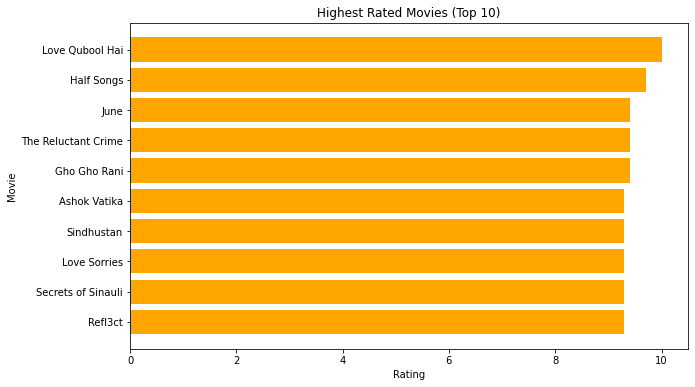

In [21]:
top_rated_movie = df_movie.sort_values(by='Rating', ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(top_rated_movie['Name'], top_rated_movie['Rating'], color='orange')
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.title('Highest Rated Movies (Top 10)')
plt.gca().invert_yaxis()
plt.show()

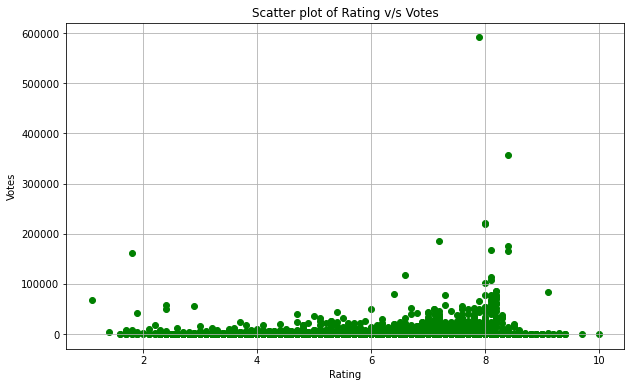

In [22]:
df_movie['Votes']= pd.to_numeric(df_movie['Votes'], errors='coerce')
plt.figure(figsize=(10,6))
plt.scatter(df_movie['Rating'], df_movie['Votes'], alpha=1.0, color='g')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Scatter plot of Rating v/s Votes')
plt.grid(True)
plt.show()

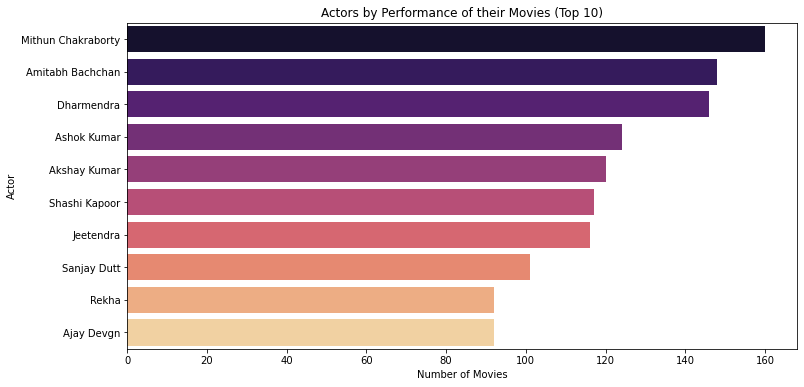

In [23]:
actor = pd.concat([df_movie['Actor 1'], df_movie['Actor 2'], df_movie['Actor 3']])
actor_count = actor.value_counts().reset_index()
actor_count.columns = ['Actor', 'Number of Movies']
plt.figure(figsize = (12,6))
sns.barplot(x = 'Number of Movies', y = 'Actor', data = actor_count.head(10), palette = 'magma')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.title('Actors by Performance of their Movies (Top 10)')
plt.show()

NameError: name 'ax_line_seaborn' is not defined

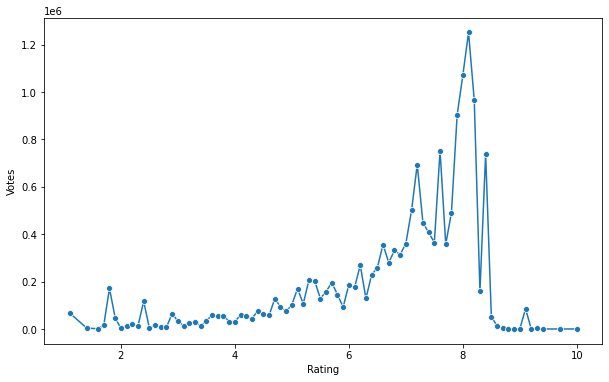

In [24]:
rating_votes = df_movie.groupby('Rating')['Votes'].sum().reset_index()
plt.figure(figsize = (10,6))
ax_line_seaborn.seaborn = sns.lineplot(data = rating_votes, x = 'Rating', y = 'Votes', marker = 'o')
ax_line_seaborn.set_xlabel('Rating')
ax_line_seaborn.set_ylabel('Total Votes')
ax_line_seaborn.set_title('Total Votes per Rating')
plt.show()

In [25]:
df_movie["Actor"] = df_movie['Actor 1'] + ',' + df_movie['Actor 2'] + ',' + df_movie['Actor 3']
df_movie["Directors"] = df_movie['Director'].astype('category').cat.codes
df_movie["Genres"] = df_movie['Genre'].astype('category').cat.codes
df_movie["Actors"] = df_movie['Actor'].astype('category').cat.codes
df_movie.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal,Vivek Ghamande,Arvind Jangid",629,229,3875
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik,Ishita Raj,Siddhant Kapoor",1335,184,3343
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor",1530,157,1119
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma",2044,289,2086
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave,Muntazir Ahmad,Kiran Bhatia",135,320,5562
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,"Augustine,Fathima Babu,Byon",401,37,974
10,1:1.6 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,"Rati Agnihotri,Gulshan Grover,Atul Kulkarni",1083,229,3880
11,1:13:7 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,"Pankaj Berry,Anubhav Dhir,Hritu Dudani",266,316,3230
12,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,"Jackie Shroff,Madhuri Dixit,Javed Jaffrey",1374,323,1900
13,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh,"Jeet,Koyel Mallick,Sujoy Ghosh",1506,159,1982


In [30]:
x = df_movie.drop(['Name','Genre','Rating','Director','Actor 1','Actor 2','Actor 3','Actor','Directors','Genres','Actors'], axis = 1)
y = df_movie['Rating']

In [31]:
x.head(10)

,Year,Duration,Votes
1,2019,109,8
3,2019,110,35
5,1997,147,827
6,2005,142,1086
8,2012,82,326
9,2014,116,11
10,2004,96,17
11,2016,120,59
12,1991,161,983
13,2012,166,512


In [43]:
y.head(10)

1     7.0
3     4.4
5     4.7
6     7.4
8     5.6
9     4.0
10    6.2
11    5.9
12    6.5
13    5.7
Name: Rating, dtype: float64

## Split train and Test dataset

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [34]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
lr_preds = LR.predict(x_test)
print(lr_preds)

[5.56704727 6.56456793 5.92509886 ... 5.98347482 5.79908168 6.37225752]


In [35]:
from sklearn.metrics import mean_squared_error, r2_score as score

In [36]:
def evaluate_model(y_true,y_pred,model_name):
    print("Model: ",model_name)
    print("Accuracy = {:0.2f}%".format(score(y_true,y_pred)*100))
    print("Mean Squared Error = {:0.2f}\n".format(mean_squared_error(y_true,y_pred,squared=False)))
    return round(score(y_true,y_pred)*100, 2)

In [37]:
LRScore = evaluate_model(y_test,lr_preds,"LINEAR REGRESSION")

Model:  LINEAR REGRESSION
Accuracy = 9.80%
Mean Squared Error = 1.29



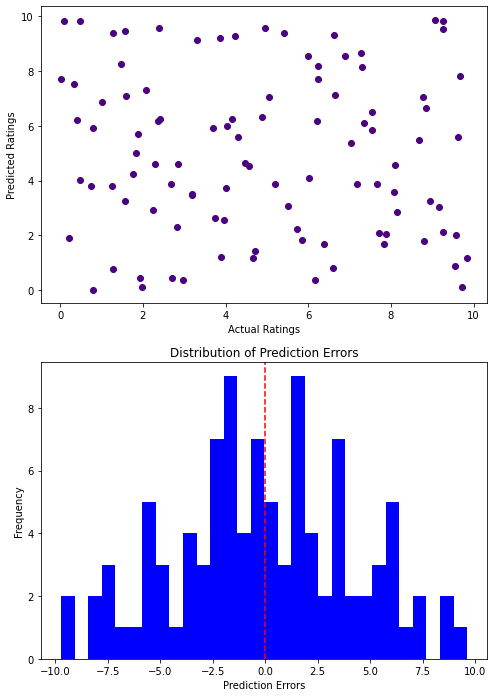

In [41]:

y_test = np.random.rand(100)*10
y_pred = np.random.rand(100)*10
error = y_test - y_pred
fig,axs = plt.subplots(2,1,figsize=(8,12))

axs[0].scatter(y_test,y_pred,color='indigo')
axs[0].set_xlabel('Actual Ratings')
axs[0].set_ylabel('Predicted Ratings')

#Histogram
axs[1].hist(error,bins=30,color='blue')
axs[1].set_xlabel('Prediction Errors')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of Prediction Errors')
axs[1].axvline(x=0,color='r',linestyle='--')
plt.show()
